In [28]:
import pandas as pd
import numpy as np

In [29]:
!wget -O True.csv https://www.dropbox.com/scl/fi/odl1rjv9ttmg4f3mjk55z/True.csv?rlkey=9d5lv7ltc1ob9mlo9iionemrm&st=tzc6sp4n&dl=0
!wget -O False.csv https://www.dropbox.com/scl/fi/303jbuwuytw9cjm9u6iyf/Fake.csv?rlkey=948fk1wbt34hppldi80vnnl9c&st=mpqkmljo&dl=0

--2024-08-14 20:31:50--  https://www.dropbox.com/scl/fi/odl1rjv9ttmg4f3mjk55z/True.csv?rlkey=9d5lv7ltc1ob9mlo9iionemrm
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc859f3653a1897a974f0fc7f6ca.dl.dropboxusercontent.com/cd/0/inline/CYpDxLLgzOeX47XHtK0Ke0sL90S4UlukStZScoxtfTHCRPH5FZgNh5UuLhAeIV3hhOw2zV-mume9A3J_GK7m8D7nwHsxEc2vvnHz4a8zaPL11lbm8ytgnFKRUi0amg9tez55LxrB2jFX1yFYMJ-QSx8X/file# [following]
--2024-08-14 20:31:51--  https://uc859f3653a1897a974f0fc7f6ca.dl.dropboxusercontent.com/cd/0/inline/CYpDxLLgzOeX47XHtK0Ke0sL90S4UlukStZScoxtfTHCRPH5FZgNh5UuLhAeIV3hhOw2zV-mume9A3J_GK7m8D7nwHsxEc2vvnHz4a8zaPL11lbm8ytgnFKRUi0amg9tez55LxrB2jFX1yFYMJ-QSx8X/file
Resolving uc859f3653a1897a974f0fc7f6ca.dl.dropboxusercontent.com (uc859f3653a1897a974f0fc7f6ca.dl.dropboxusercontent.com)... 162.125.65.15, 2620:10

In [30]:
#Readin input files
dft = pd.read_csv("True.csv")
dff = pd.read_csv("False.csv")

In [31]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [32]:
dft.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [33]:
#New column reliability
dft = dft.assign(reliability=[1 for i in range(len(dft))])
dff = dft.assign(reliability=[0 for i in range(len(dft))])

In [34]:
#Concatinating real and fake news_dataframes
df = pd.concat([dft, dff], axis=0)
df.index = range(0,len(df))

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42834 entries, 0 to 42833
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        42834 non-null  object
 1   text         42834 non-null  object
 2   subject      42834 non-null  object
 3   date         42834 non-null  object
 4   reliability  42834 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ MB


In [36]:
df.tail(10)

,title,text,subject,date,reliability
42824,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",0
42825,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",0
42826,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",0
42827,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",0
42828,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",0
42829,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
42830,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
42831,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
42832,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0
42833,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0


In [37]:
def standardize_text(df, content_field):
    df[content_field] = df[content_field].str.replace(r"[^A-Za-z0-9\(\),!?@\'\`\"_n]", " ")
    df[content_field] = df[content_field].replace(r'[^?!\.\w\s]',' ',regex=True)
    df[content_field] = df[content_field].str.lower()
    return df

In [38]:
standardize_text(df, "title")
standardize_text(df, "text")
standardize_text(df, "subject")
standardize_text(df, "date")

,title,text,subject,date,reliability
0,as u.s. budget fight looms republicans flip t...,washington reuters the head of a conservat...,politicsnews,december 31 2017,1
1,u.s. military to accept transgender recruits o...,washington reuters transgender people will...,politicsnews,december 29 2017,1
2,senior u.s. republican senator let mr. muell...,washington reuters the special counsel inv...,politicsnews,december 31 2017,1
3,fbi russia probe helped by australian diplomat...,washington reuters trump campaign adviser ...,politicsnews,december 30 2017,1
4,trump wants postal service to charge much mor...,seattle washington reuters president donal...,politicsnews,december 29 2017,1
...,...,...,...,...,...
42829,fully committed nato backs new u.s. approach...,brussels reuters nato allies on tuesday we...,worldnews,august 22 2017,0
42830,lexisnexis withdrew two products from chinese ...,london reuters lexisnexis a provider of l...,worldnews,august 22 2017,0
42831,minsk cultural hub becomes haven from authorities,minsk reuters in the shadow of disused sov...,worldnews,august 22 2017,0
42832,vatican upbeat on possibility of pope francis ...,moscow reuters vatican secretary of state ...,worldnews,august 22 2017,0


In [42]:
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [43]:
def lemmatization(df, content_field):
  lemmatizer=WordNetLemmatizer()
  corpus = []
  for i in range(0,len(df)):
    text = df[content_field][i]
    tokens = word_tokenize(text)
    lemmatized_text = [lemmatizer.lemmatize(word) for word in tokens if not word in stopwords.words('english')]
    text = ' '.join(lemmatized_text)
    corpus.append(text)
  return corpus

In [44]:
for column in df.columns[:-1]:
  df[column] = lemmatization(df, column)

In [16]:
df.tail()

,title,text,subject,date,reliability
42829,fully committed nato back new u.s. approach on...,brussels reuters nato ally on tuesday welcomed...,worldnews,august 22 2017,0
42830,lexisnexis withdrew two product from chinese m...,london reuters lexisnexis a provider of legal ...,worldnews,august 22 2017,0
42831,minsk cultural hub becomes haven from authority,minsk reuters in the shadow of disused soviet ...,worldnews,august 22 2017,0
42832,vatican upbeat on possibility of pope francis ...,moscow reuters vatican secretary of state card...,worldnews,august 22 2017,0
42833,indonesia to buy 1.14 billion worth of russian...,jakarta reuters indonesia will buy 11 sukhoi f...,worldnews,august 22 2017,0


In [45]:
df.to_csv('Fake_True.csv', index = True)

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(list(df["text"]))

#X = list()
#for i in range(0, len(df)):
#  raw = list(df.loc[i][:-1])
#  X.append( tfidf.fit_transform(raw)  )

y = list(df[df.columns[-1]])

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=50)

In [64]:
from sklearn.svm import LinearSVC
classifier = LinearSVC()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [65]:
y_pred = classifier.predict(X_test)
y_pred[:5]

array([0, 1, 1, 0, 0])

              precision    recall  f1-score   support

           0       0.44      0.45      0.44     18673
           1       0.47      0.45      0.46     19878

    accuracy                           0.45     38551
   macro avg       0.45      0.45      0.45     38551
weighted avg       0.45      0.45      0.45     38551

Accuracy Score of SVC: 45.07535472490986 %


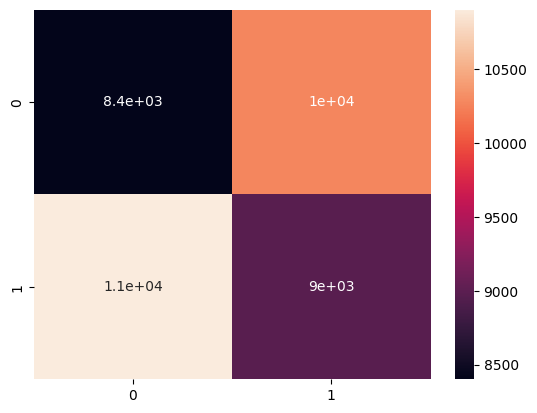

In [66]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
acc = accuracy_score(y_pred, y_test)
report = classification_report(y_pred, y_test)
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True)
print(report)
print("Accuracy Score of SVC:", acc*100,"%")